<a href="https://colab.research.google.com/github/SardorbekAI/Deep_Learning/blob/main/Fruit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit/ && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [ ]:
!cd OIDv4_ToolKit/ && python3 main.py downloader --Dataset /content --classes Apple Orange Strawberry Grape Banana --type_csv train --limit 150


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Apple.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 34645 KB/s, 0 seconds passed
[DOWNLOAD] | File cl

In [ ]:
path = Path('train')
fls = get_image_files(path)
failed = verify_images(path)
failed

In [ ]:
fruits = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 37),
    get_y = parent_label,
    item_tfms = Resize(224)
)

In [ ]:
dls = fruits.dataloaders(path)

In [ ]:
dls.train.show_batch(max_n = 5, nrows = 1)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(5)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

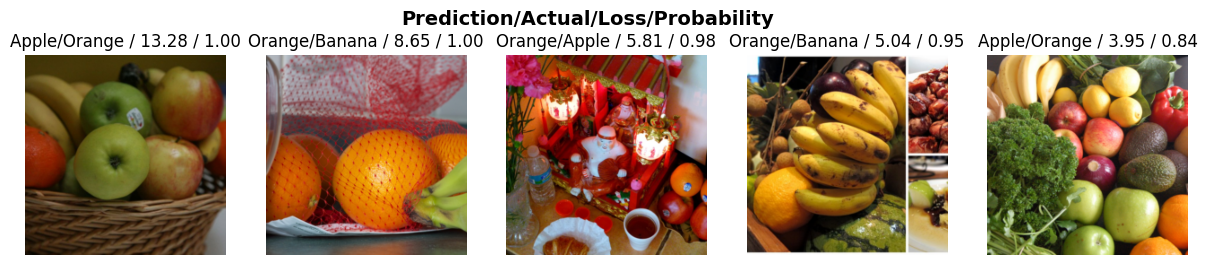

In [ ]:
interp.plot_top_losses(5, nrows = 1)

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Ehtimollik: Orange 99.9


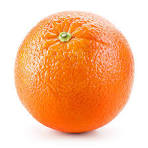

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_idx, prob = learn.predict(img)
print(f"Ehtimollik: {pred} {prob[pred_idx] * 100:.1f}")
img

In [ ]:
learn.export("fruits_model.pkl")

In [ ]:
model = load_learner("fruits_model.pkl")
model.predict(img)

('Apple',
 tensor(0),
 tensor([9.9999e-01, 9.2631e-07, 1.8180e-07, 4.0575e-06, 1.6612e-06]))